# A neural network for a binary classification

## import library

In [322]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm
import os
from tqdm import tqdm

## load data

In [323]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/MachineLearning2022-2/MachineLearning2022-2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/MachineLearning2022-2/MachineLearning2022-2


In [324]:
directory_data  = './'
filename_data   = 'assignment_03_data.npz'
path_data       = os.path.join(directory_data, filename_data) 
data            = np.load(path_data)

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

In [325]:
print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (10000, 28, 28)
size of y_train : (10000,)
*************************************************
size of x_test : (1800, 28, 28)
size of y_test : (1800,)
*************************************************
number of training image : 10000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 1800
height of testing image : 28
width of testing image : 28
*************************************************


## convert data into numpy array

In [326]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test  = np.asarray(x_test)
y_test  = np.asarray(y_test)

## plot grey image

In [327]:
def plot_image(title, data):

    nRow = 2
    nCol = 4
    size = 4
    
    fig, axes = plt.subplots(nRow, nCol, figsize=(size * nCol, size * nRow))
    fig.suptitle(title, fontsize=16)
    
    for i in range(nRow):
        for j in range(nCol):

            k = i * nCol + j
            axes[i, j].imshow(data[k], cmap='gray', vmin=0, vmax=1)

    plt.tight_layout()
    plt.show()

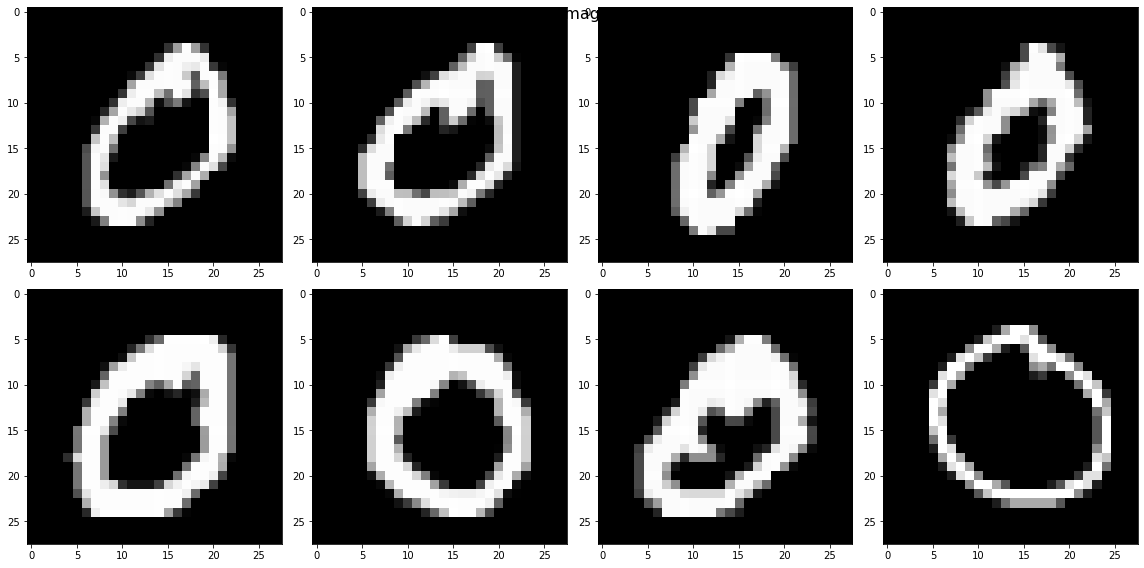

In [328]:
plot_image('training image for 0', x_train)

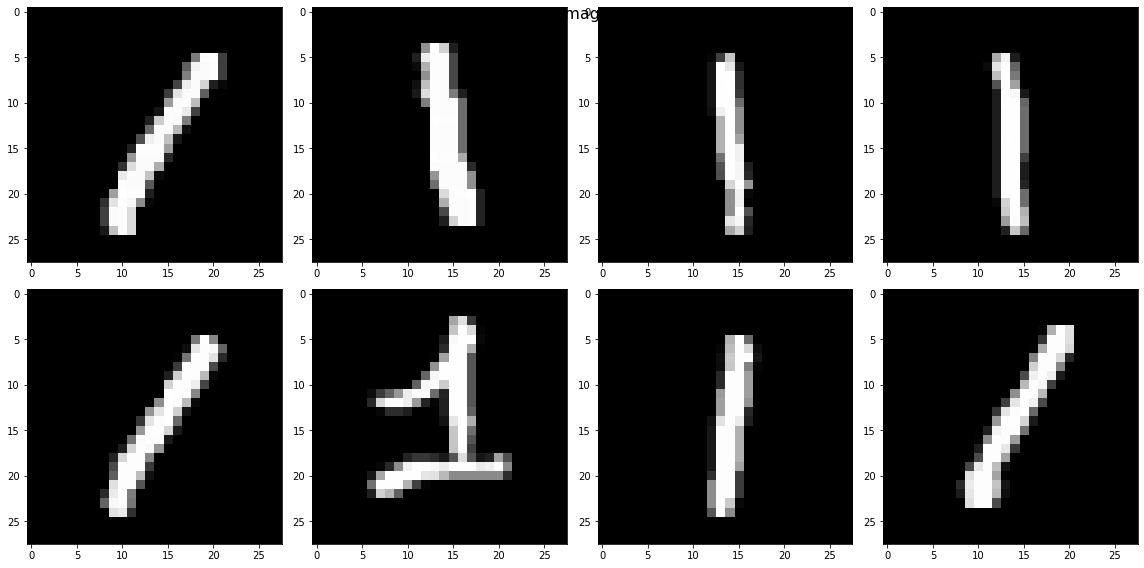

In [329]:
plot_image('training image for 1', x_train[5000:,:,:])

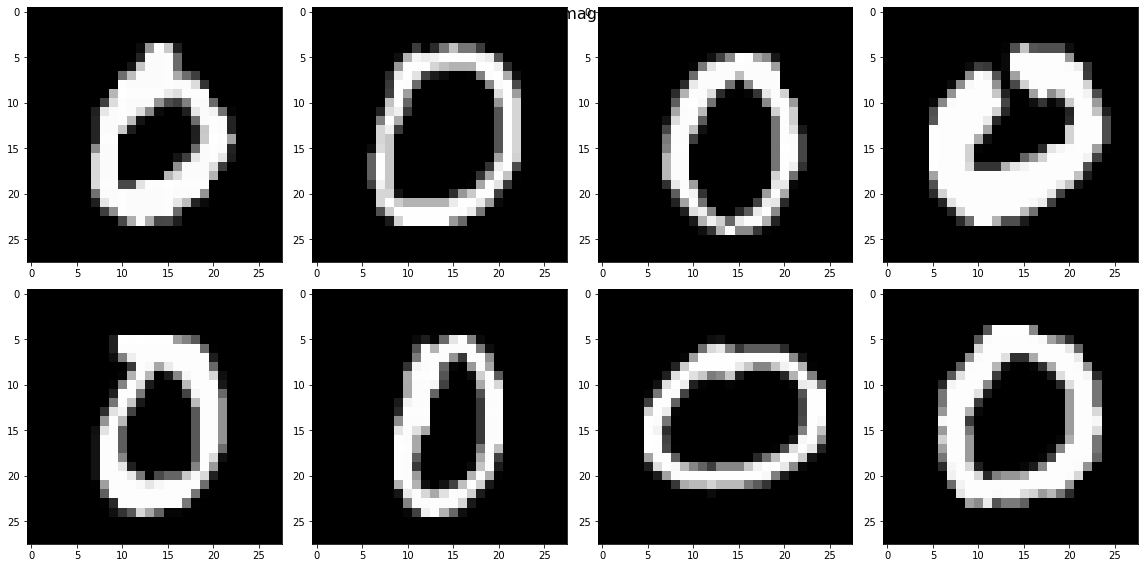

In [330]:
plot_image('testing image for 0', x_test)

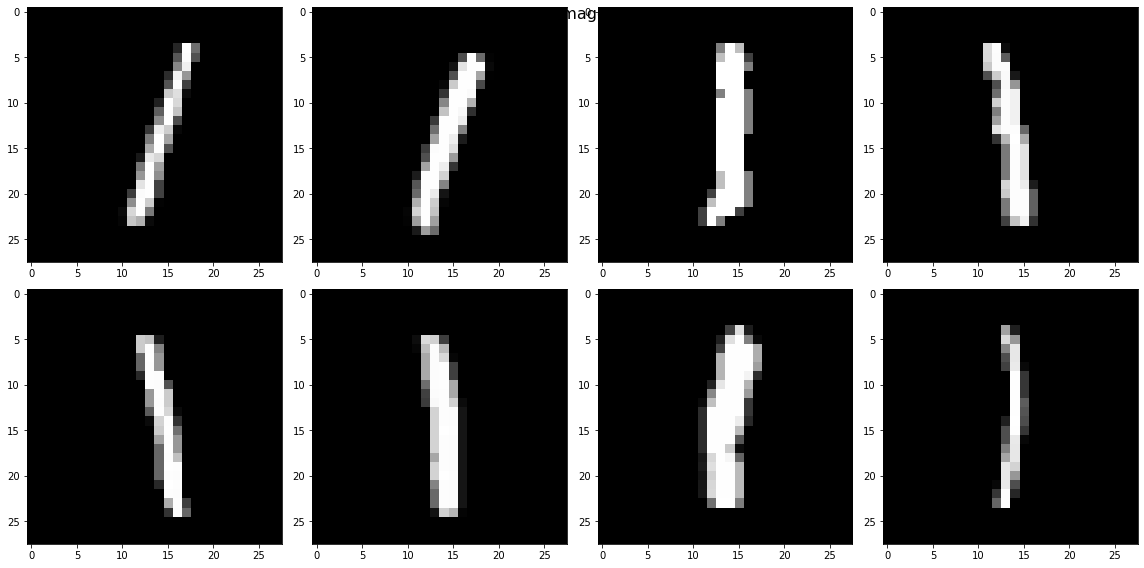

In [331]:
plot_image('testing image for 1', x_test[900:])

## reshape input data

- vectorize input image matrices into vectors (row-major order)

In [332]:
vec_x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vec_x_test  = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [333]:
print('size of training input :', vec_x_train.shape)
print('size of training output :', y_train.shape)

print('size of testing input :', vec_x_test.shape)
print('size of testing output :', y_test.shape)

size of training input : (10000, 784)
size of training output : (10000,)
size of testing input : (1800, 784)
size of testing output : (1800,)


In [334]:
x_train = vec_x_train.transpose()
x_test  = vec_x_test.transpose()

length_data         = x_train.shape[0]
number_data_train   = x_train.shape[1]
number_data_test    = x_test.shape[1]

y_train.reshape(1, number_data_train)
y_test.reshape(1, number_data_test)

array([[0., 0., 0., ..., 1., 1., 1.]])

In [335]:
print('size of training input :', x_train.shape)
print('size of training output :', y_train.shape)

print('size of testing input :', x_test.shape)
print('size of testing output :', y_test.shape)

print('number of training data :', number_data_train)
print('number of testing data :', number_data_test)

size of training input : (784, 10000)
size of training output : (10000,)
size of testing input : (784, 1800)
size of testing output : (1800,)
number of training data : 10000
number of testing data : 1800


## reshape the ground truth

In [336]:
index_train_0 = np.where(y_train == 0)[0]
index_train_1 = np.where(y_train == 1)[0]

index_test_0 = np.where(y_test == 0)[0]
index_test_1 = np.where(y_test == 1)[0]

In [337]:
print('size of ground truth for 0 in the training :', index_train_0.shape)
print('size of ground truth for 1 in the training :', index_train_1.shape)

print('size of ground truth for 0 in the testing :', index_test_0.shape)
print('size of ground truth for 1 in the testing :', index_test_1.shape)

size of ground truth for 0 in the training : (5000,)
size of ground truth for 1 in the training : (5000,)
size of ground truth for 0 in the testing : (900,)
size of ground truth for 1 in the testing : (900,)


In [338]:
print("y_train[:5000]: ",y_train[:5000])
print("y_train[5000:]: ",y_train[5000:])

y_train[:5000]:  [0. 0. 0. ... 0. 0. 0.]
y_train[5000:]:  [1. 1. 1. ... 1. 1. 1.]


## initialize the neural network

- neural network consists of fullly connected linear layer followed by sigmoid activation function
- the size of the fully connected layer is input 784 and output 1

## initialize the weights for the fully connected layer

- create one matrix for the weights

In [339]:
size_input  = length_data 
size_output = 1

weight = np.ones((size_output, size_input))

In [340]:
print('size of the weight :', weight.shape)

size of the weight : (1, 784)


## define neural network 

### define sigmoid function 

In [341]:
def activation_sigmoid(input):

# ================================================== 
# fill up the blank
#
    output = 1/(1+np.exp(-input))
#
# ================================================== 
    return output 

In [342]:
def derivative_sigmoid(input):

# ================================================== 
# fill up the blank
#
    sig=activation_sigmoid(input)
    output = sig*(1-sig)
#
# ================================================== 
    return output

### define the layer

- $n$ : the number of data
- input : $784 \times n$
- output : $1 \times n$

In [343]:
def layer_fully_connected(input, weight):

# ================================================== 
# fill up the blank
#
    output = np.dot(weight, input)
#
# ================================================== 
    return output

## define forward propagation

In [344]:
def compute_prediction(input, weight):

# ================================================== 
# fill up the blank
#

    output=layer_fully_connected(input, weight)
    prediction  = activation_sigmoid(output)
#
# ==================================================     
    return prediction 

## define the loss function

- cross entropy between the ground truth and the prediction
- cross entropy : $-y \log(h) - (1-y) \log(1-h)$
  - $y$ : grount truth
  - $h$ : prediction
- output dimension : $1 \times 1$

In [345]:
def compute_loss(prediction, label):

# ================================================== 
# fill up the blank
#
    loss = -label*np.log(prediction) -(1-label)*np.log(1-prediction)
#
# ==================================================
    return loss

## compute the accuracy

- note that iterations over the input data are not allowed inside the function

In [346]:
def compute_accuracy(prediction, label):

# ================================================== 
# fill up the blank
#    



    accuracy = -1
#
# ==================================================
    return accuracy

## compute the gradient with respect to the weights

- note that iterations over the input data are not allowed inside the function
- size of input : $m \times n$
- size of label : $1 \times n$
- size of prediction : $1 \times n$
- $n$ denotes the number of data
- $m$ denotes the length of each data

In [347]:
def compute_gradient_weight(input, label, prediction):

# ================================================== 
# fill up the blank
#    
    residual = prediction -label
    #print("residual.shape: ", residual.shape)
    print("residual: ", residual)
    residual_T= residual.transpose()
    #print("residual_T.shape: ", residual_T.shape)
    gradient = input@residual_T
    print("gradient.shape: ", gradient.shape)
#
# ==================================================
    return gradient

## gradient descent algorithm

- hyper-parameters

In [348]:
number_iteration    = 500
learning_rate       = 0.01
weight              = weight * 0.01

## variables for storing intermediate results

In [349]:
accuracy_train  = np.zeros(number_iteration)
accuracy_test   = np.zeros(number_iteration)

loss_train_mean = np.zeros(number_iteration)
loss_train_std  = np.zeros(number_iteration)
loss_test_mean  = np.zeros(number_iteration)
loss_test_std   = np.zeros(number_iteration)

prediction_train_0_mean = np.zeros(number_iteration)
prediction_train_0_std  = np.zeros(number_iteration)
prediction_train_1_mean = np.zeros(number_iteration)
prediction_train_1_std  = np.zeros(number_iteration)
prediction_test_0_mean  = np.zeros(number_iteration)
prediction_test_0_std   = np.zeros(number_iteration)
prediction_test_1_mean  = np.zeros(number_iteration)
prediction_test_1_std   = np.zeros(number_iteration)

## run the gradient descent algorithm

In [350]:
x_train_0=x_train[:,0:5000]
x_train_1=x_train[:,5000:]

x_test_0=x_test[:,0:900]
x_test_1=x_test[:,900:]

y_train_0=y_train[:5000]
y_train_1=y_train[5000:]

#print("x_train_0.shape: ", x_train_0.shape)
#print("weight.shape: ", weight.shape)

pred_train_0  = compute_prediction(x_train_0, weight) 

#print("y_train_0.shape: ", y_train_0.shape)

loss_train_0 = compute_loss(pred_train_0, y_train_0)
#print("pred_train_0.shape: ", pred_train_0.shape)
#print("pred_train_0: ", pred_train_0)
#print("loss_train_0.shape: ", loss_train_0.shape)


grad_train_0 = compute_gradient_weight(x_train_0, y_train_0, pred_train_0)
#1
print("====================")
pred_train_1  = compute_prediction(x_train_1, weight) 

print("y_train_1.shape: ", y_train_1.shape)

loss_train_1 = compute_loss(pred_train_1, y_train_1)
print("pred_train_1.shape: ", pred_train_1.shape)
print("pred_train_1: ", pred_train_1)
print("loss_train_1.shape: ", loss_train_1.shape)

grad_train_1 = compute_gradient_weight(x_train_1, y_train_1, pred_train_1)

x_train_0.shape:  (784, 5000)
weight.shape:  (1, 784)
y_train_0.shape:  (5000,)
pred_train_0.shape:  (1, 5000)
pred_train_0:  [[0.77196002 0.80051711 0.80715782 ... 0.77876272 0.86484837 0.75857133]]
loss_train_0.shape:  (1, 5000)
residual:  [[0.77196002 0.80051711 0.80715782 ... 0.77876272 0.86484837 0.75857133]]
gradient.shape:  (784, 1)
y_train_1.shape:  (5000,)
pred_train_1.shape:  (1, 5000)
pred_train_1:  [[0.66194207 0.66641169 0.60502119 ... 0.62142661 0.59177165 0.68807547]]
loss_train_1.shape:  (1, 5000)
residual:  [[-0.33805793 -0.33358831 -0.39497881 ... -0.37857339 -0.40822835
  -0.31192453]]
gradient.shape:  (784, 1)


In [351]:
"""
for i in tqdm(range(number_iteration)):

# ================================================== 
# fill up the blank
#    
    x_train_0=x_train[:,0:5000]
    x_train_1=x_train[:,5000:]

    x_test_0=x_test[:,0:900]
    x_test_1=x_test[:,900:]

    y_train_0=y_train[:5000]
    y_train_1=y_train[5000:]

    pred_train_0  = compute_prediction(x_train_0, weight) 
    loss_train_0 = compute_loss(pred_train_0, y_train_0)
    print("pred_train_0.shape: ", pred_train_0.shape)


#
# ==================================================
  
    accuracy_train[i]   = 
    accuracy_test[i]    = 
    
    loss_train_mean[i]  = 
    loss_train_std[i]   = 
    loss_test_mean[i]   = 
    loss_test_std[i]    = 

    prediction_train_0_mean[i]  = 
    prediction_train_0_std[i]   = 
    prediction_train_1_mean[i]  = 
    prediction_train_1_std[i]   = 
    prediction_test_0_mean[i]   = 
    prediction_test_0_std[i]    = 
    prediction_test_1_mean[i]   = 
    prediction_test_1_std[i]    = 
"""

  0%|          | 0/500 [00:00<?, ?it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


  2%|▏         | 11/500 [00:00<00:04, 104.93it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


  4%|▍         | 22/500 [00:00<00:04, 99.07it/s] 

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


  6%|▋         | 32/500 [00:00<00:04, 95.62it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape: 

  8%|▊         | 42/500 [00:00<00:04, 95.94it/s]

 (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape: 

 11%|█         | 53/500 [00:00<00:04, 96.62it/s]

 (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 13%|█▎        | 63/500 [00:00<00:04, 90.03it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 15%|█▍        | 73/500 [00:00<00:04, 92.71it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 17%|█▋        | 84/500 [00:00<00:04, 95.60it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 19%|█▉        | 94/500 [00:01<00:04, 90.21it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 21%|██        | 104/500 [00:01<00:04, 92.10it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 23%|██▎       | 114/500 [00:01<00:04, 90.11it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 25%|██▍       | 124/500 [00:01<00:04, 88.00it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape: 

 27%|██▋       | 133/500 [00:01<00:04, 87.34it/s]

 (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 29%|██▊       | 143/500 [00:01<00:03, 89.73it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 31%|███       | 153/500 [00:01<00:04, 86.37it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 33%|███▎      | 163/500 [00:01<00:03, 89.88it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 35%|███▍      | 173/500 [00:01<00:03, 86.81it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 37%|███▋      | 183/500 [00:02<00:03, 89.38it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 39%|███▊      | 193/500 [00:02<00:03, 91.61it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  

 41%|████      | 203/500 [00:02<00:03, 93.60it/s]

(1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 43%|████▎     | 213/500 [00:02<00:03, 95.20it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape: 

 45%|████▍     | 223/500 [00:02<00:02, 92.57it/s]

 (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape: 

 47%|████▋     | 233/500 [00:02<00:02, 91.79it/s]

 (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 49%|████▊     | 243/500 [00:02<00:02, 88.74it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 51%|█████     | 253/500 [00:02<00:02, 90.42it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 53%|█████▎    | 263/500 [00:02<00:02, 90.31it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 55%|█████▌    | 275/500 [00:02<00:02, 97.54it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 57%|█████▋    | 285/500 [00:03<00:02, 94.32it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 59%|█████▉    | 297/500 [00:03<00:02, 98.55it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 61%|██████▏   | 307/500 [00:03<00:01, 96.51it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 63%|██████▎   | 317/500 [00:03<00:01, 97.31it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 66%|██████▌   | 328/500 [00:03<00:01, 99.64it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  

 68%|██████▊   | 339/500 [00:03<00:01, 100.71it/s]

(1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 70%|███████   | 350/500 [00:03<00:01, 99.04it/s] 

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 72%|███████▏  | 360/500 [00:03<00:01, 95.50it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 74%|███████▍  | 370/500 [00:03<00:01, 95.48it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 76%|███████▌  | 380/500 [00:04<00:01, 94.84it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 78%|███████▊  | 391/500 [00:04<00:01, 96.98it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 80%|████████  | 401/500 [00:04<00:01, 97.76it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 82%|████████▏ | 412/500 [00:04<00:00, 99.07it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 84%|████████▍ | 422/500 [00:04<00:00, 92.80it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape: 

 86%|████████▋ | 432/500 [00:04<00:00, 91.48it/s]

 (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 88%|████████▊ | 442/500 [00:04<00:00, 92.65it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 91%|█████████ | 453/500 [00:04<00:00, 95.48it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 93%|█████████▎| 463/500 [00:04<00:00, 95.95it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 95%|█████████▍| 474/500 [00:05<00:00, 97.56it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 97%|█████████▋| 484/500 [00:05<00:00, 93.18it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


 99%|█████████▉| 494/500 [00:05<00:00, 94.78it/s]

pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)
pred_train_0.shape:  (1, 5000)


100%|██████████| 500/500 [00:05<00:00, 93.67it/s]

pred_train_0.shape:  (1, 5000)


---

## functions for presenting the results

---

In [352]:
def function_result_01():

    title           = 'loss (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_train_mean)), loss_train_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_train_mean)), loss_train_mean - loss_train_std, loss_train_mean + loss_train_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [353]:
def function_result_02():

    title           = 'loss (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_test_mean)), loss_test_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_test_mean)), loss_test_mean - loss_test_std, loss_test_mean + loss_test_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [354]:
def function_result_03():

    title           = 'prediction for 0 (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_train_0_mean)), prediction_train_0_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_train_0_mean)), prediction_train_0_mean - prediction_train_0_std, prediction_train_0_mean + prediction_train_0_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [355]:
def function_result_04():

    title           = 'prediction for 1 (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_train_1_mean)), prediction_train_1_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_train_1_mean)), prediction_train_1_mean - prediction_train_1_std, prediction_train_1_mean + prediction_train_1_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [356]:
def function_result_05():

    title           = 'prediction for 0 (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_test_0_mean)), prediction_test_0_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_test_0_mean)), prediction_test_0_mean - prediction_test_0_std, prediction_test_0_mean + prediction_test_0_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [357]:
def function_result_06():

    title           = 'prediction for 1 (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'prediction'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(prediction_test_1_mean)), prediction_test_1_mean, '-', color = color_mean)
    plt.fill_between(range(len(prediction_test_1_mean)), prediction_test_1_mean - prediction_test_1_std, prediction_test_1_mean + prediction_test_1_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [358]:
def function_result_07():

    title           = 'accuracy (training)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_train)), accuracy_train, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [359]:
def function_result_08():

    title           = 'accuracy (testing)'
    label_axis_x    = 'iteration' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_test)), accuracy_test, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [360]:
def function_result_09():

    print('final training loss = %6.5f' % (loss_train_mean[-1]))

In [361]:
def function_result_10():

    print('final testing loss = %6.5f' % (loss_test_mean[-1]))

In [362]:
def function_result_11():

    print('final training accuracy = %6.5f' % (accuracy_train[-1]))

In [363]:
def function_result_12():

    print('final testing accuracy = %6.5f' % (accuracy_test[-1]))

---

## results 

---


################################################################################
#
# RESULT # 01
#
################################################################################



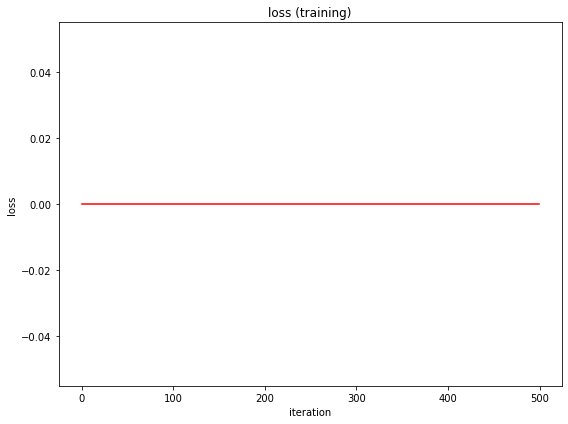


################################################################################
#
# RESULT # 02
#
################################################################################



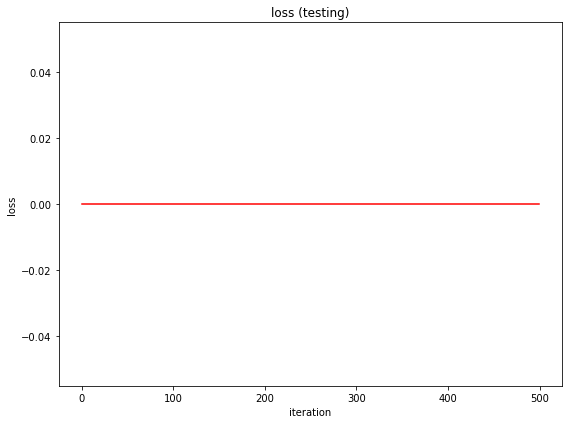


################################################################################
#
# RESULT # 03
#
################################################################################



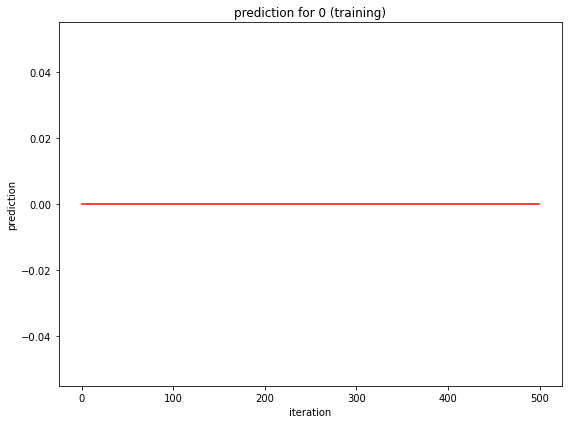


################################################################################
#
# RESULT # 04
#
################################################################################



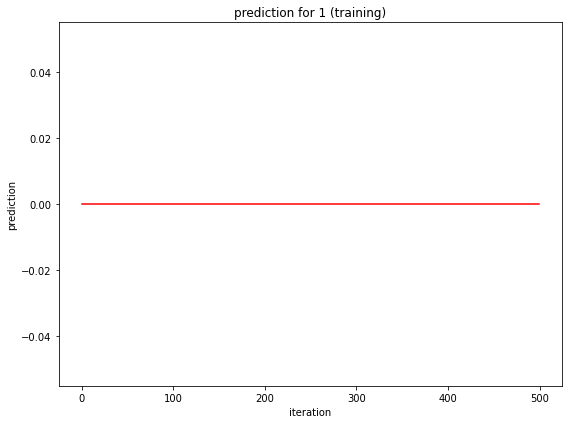


################################################################################
#
# RESULT # 05
#
################################################################################



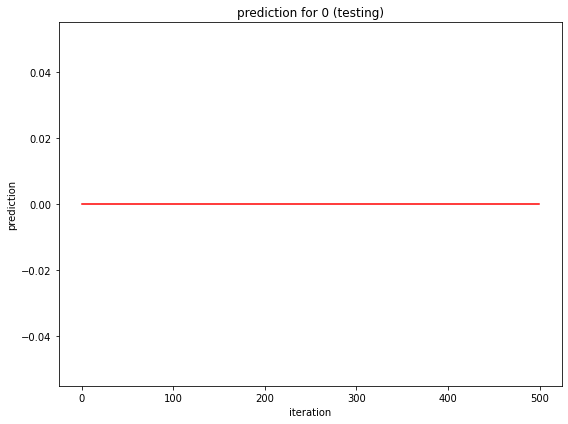


################################################################################
#
# RESULT # 06
#
################################################################################



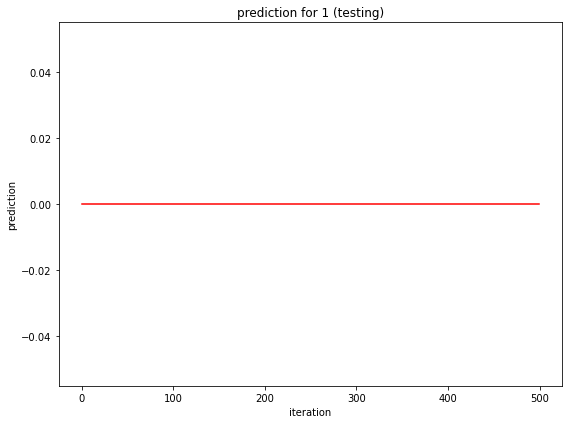


################################################################################
#
# RESULT # 07
#
################################################################################



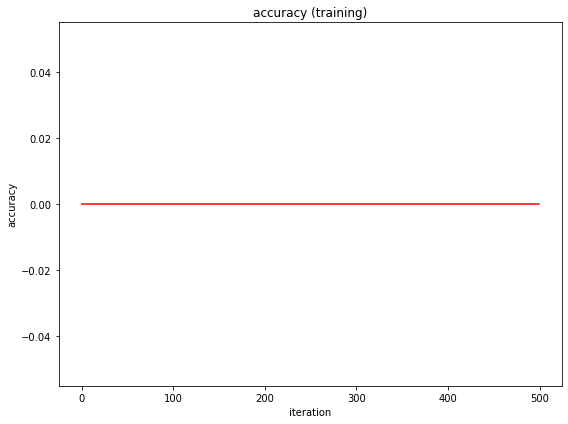


################################################################################
#
# RESULT # 08
#
################################################################################



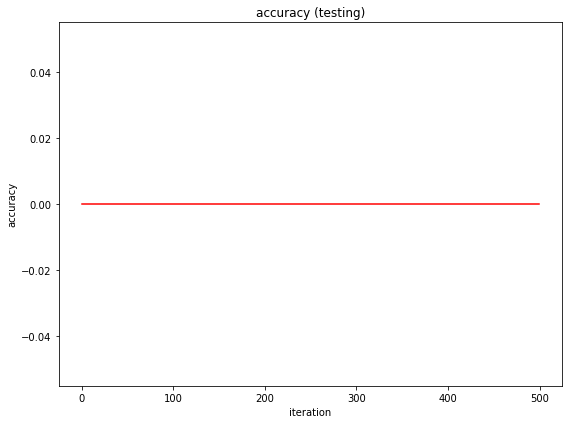


################################################################################
#
# RESULT # 09
#
################################################################################

final training loss = 0.00000

################################################################################
#
# RESULT # 10
#
################################################################################

final testing loss = 0.00000

################################################################################
#
# RESULT # 11
#
################################################################################

final training accuracy = 0.00000

################################################################################
#
# RESULT # 12
#
################################################################################

final testing accuracy = 0.00000


In [364]:
number_result = 12 

for i in range(number_result):

    title           = '# RESULT # {:02d}'.format(i+1) 
    name_function   = 'function_result_{:02d}()'.format(i+1)

    print('') 
    print('################################################################################')
    print('#') 
    print(title)
    print('#') 
    print('################################################################################')
    print('') 

    eval(name_function)